# importing the dependencies

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# importing the models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
!dir()

 Volume in drive F has no label.
 Volume Serial Number is 8AD7-0A22

 Directory of f:\Data Science Project\Heart



File Not Found


In [7]:
#loadining the csv data to a Pandas DataFrame
heart_data =pd.read_csv('Heart.csv')

In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.shape

(303, 14)

In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## spliting the Features and Target

In [9]:
X= heart_data.drop(['target'], axis=1)
y=heart_data['target']

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size = 0.2, stratify=y, random_state=3)

# train test split

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


# Comparing the performance of the models

In [ ]:
# list of Models
models=[LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [ ]:
def compare_model_train_test():

    for model in models:

        model.fit(X_train,Y_train)
        test_data_prediction=model.predict(X_test)
        accuracy=accuracy_score(Y_test,test_data_prediction)

        print('accuracy_score of the ', model, ' = ', accuracy)

In [ ]:
compare_model_train_test()

accuracy_score of the  LogisticRegression(max_iter=1000)  =  0.7704918032786885
accuracy_score of the  SVC(kernel='linear')  =  0.7704918032786885
accuracy_score of the  KNeighborsClassifier()  =  0.6557377049180327
accuracy_score of the  RandomForestClassifier()  =  0.7868852459016393


# Cross validation

In [ ]:
#Cross validation with Logistic Regression
cv_score_lr=cross_val_score(LogisticRegression(max_iter=10000),X,y, cv=5)

print(cv_score_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]


In [ ]:
mean_accuray_lr= sum(cv_score_lr)/len(cv_score_lr)
mean_accuray_lr= mean_accuray_lr*100
mean_accuray_lr= round(mean_accuray_lr,2)
print(mean_accuray_lr)

82.83


In [ ]:
# Cross validation with SVC

# cara melatih jika ada data baru

In [76]:
model = LogisticRegression(max_iter=10000)
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [ ]:
# Misalkan X_test adalah data fitur baru dan y_test adalah label sebenarnya
y_pred = model.predict(X_test)

# Menghitung skor akurasi model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.819672131147541


# comparing cross Validation

In [ ]:
cv_score_svc=cross_val_score(SVC(kernel='linear'),X,y,cv=5)
print(cv_score_svc)
mean_accuray_svc= sum(cv_score_svc)/len(cv_score_svc)
mean_accuray_svc= mean_accuray_svc*100
mean_accuray_svc= round(mean_accuray_svc,2)
print(mean_accuray_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


In [33]:
models=[LogisticRegression(max_iter=10000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]




In [13]:
def compare_model_cross_validation():
    for model in models:
        cv_score=cross_val_score(model,X,y, cv=5)
        
        mean_accuracy= sum(cv_score)/len(cv_score)
        
        mean_accuracy= mean_accuracy*100
        
        mean_accuracy= round(mean_accuracy,2)

        print('Cross Validation accracies for the', model, ' =  ', cv_score)
        print('Accuracy  % of the ', model, mean_accuracy)
        print('------------------------------------------')



In [34]:
compare_model_cross_validation()

Cross Validation accracies for the LogisticRegression(max_iter=10000)  =   [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy  % of the  LogisticRegression(max_iter=10000) 82.83
------------------------------------------
Cross Validation accracies for the SVC(kernel='linear')  =   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy  % of the  SVC(kernel='linear') 82.83
------------------------------------------
Cross Validation accracies for the KNeighborsClassifier()  =   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy  % of the  KNeighborsClassifier() 64.39
------------------------------------------
Cross Validation accracies for the RandomForestClassifier(random_state=0)  =   [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy  % of the  RandomForestClassifier(random_state=0) 83.81
------------------------------------------


## Hyper Parameters Tuning

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
x=heart_data.drop(['target'], axis= 1 )
y=heart_data['target']

In [10]:
model = SVC()
hyperparameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}
classifier = GridSearchCV(model, hyperparameters, cv=3)
x=heart_data.drop(['target'], axis= 1 )
y=heart_data['target']
classifier.fit(x, y)

C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
classifier.cv_results_

{'mean_fit_time': array([8.21292400e-01, 7.24657377e-03, 5.74318568e-03, 6.99305534e-03,
        2.79858740e+00, 5.99352519e-03, 6.23869896e-03, 6.24227524e-03,
        8.70657682e+00, 5.73285421e-03, 5.73889414e-03, 5.49324354e-03,
        1.35411475e+01, 6.93488121e-03, 5.66283862e-03, 5.74262937e-03]),
 'std_fit_time': array([4.20444526e-01, 1.13932032e-03, 7.06943139e-04, 7.06215552e-04,
        3.99267453e-01, 1.05917840e-03, 7.13799265e-04, 9.34582117e-04,
        6.24562497e+00, 7.01977674e-04, 7.10000156e-04, 9.35644795e-04,
        8.00123225e+00, 8.49563941e-04, 7.59236602e-04, 7.06493680e-04]),
 'mean_score_time': array([0.00474668, 0.00384029, 0.00624442, 0.00399621, 0.00330861,
        0.00324718, 0.00599933, 0.0037477 , 0.00466688, 0.00325878,
        0.00584737, 0.00449729, 0.0029974 , 0.00399605, 0.00648801,
        0.00349927]),
 'std_score_time': array([0.00035252, 0.00062773, 0.0003542 , 0.0003528 , 0.00031872,
        0.00035342, 0.00061285, 0.00061311, 0.0014389 , 

In [19]:
result=pd.DataFrame(classifier.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.821292,0.420445,0.004747,0.000353,1,linear,"{'C': 1, 'kernel': 'linear'}",0.841584,0.861386,0.811881,0.838284,0.020345,1
1,0.007247,0.001139,0.003840,0.000628,1,poly,"{'C': 1, 'kernel': 'poly'}",0.603960,0.722772,0.603960,0.643564,0.056008,11
2,0.005743,0.000707,0.006244,0.000354,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.594059,0.693069,0.603960,0.630363,0.044524,12
3,0.006993,0.000706,0.003996,0.000353,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.544554,0.544554,0.544554,0.544554,0.000000,16
4,2.798587,0.399267,0.003309,0.000319,5,linear,"{'C': 5, 'kernel': 'linear'}",0.851485,0.841584,0.821782,0.838284,0.012349,1
5,0.005994,0.001059,0.003247,0.000353,5,poly,"{'C': 5, 'kernel': 'poly'}",0.663366,0.732673,0.643564,0.679868,0.038204,7
6,0.006239,0.000714,0.005999,0.000613,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.653465,0.732673,0.653465,0.679868,0.037339,7
7,0.006242,0.000935,0.003748,0.000613,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",0.455446,0.613861,0.623762,0.564356,0.077118,13
8,8.706577,6.245625,0.004667,0.001439,10,linear,"{'C': 10, 'kernel': 'linear'}",0.821782,0.831683,0.821782,0.825083,0.004667,3
9,0.005733,0.000702,0.003259,0.000358,10,poly,"{'C': 10, 'kernel': 'poly'}",0.663366,0.742574,0.643564,0.683168,0.042777,6


In [20]:
classifier.best_params_

{'C': 1, 'kernel': 'linear'}

In [21]:
classifier.best_score_

np.float64(0.8382838283828383)

In [22]:
model = SVC()
hyperparameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}
classifier = RandomizedSearchCV(model, hyperparameters, cv=3)
x=heart_data.drop(['target'], axis= 1 )
y=heart_data['target']
classifier.fit(x, y)

C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

# Model Selection
1 comparong the model with the default hyperparameter values using Cross Validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
# importing the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
model_list=[LogisticRegression(max_iter=10000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]




In [14]:
def compare_model_cross_validation():
    for model in models:
        cv_score=cross_val_score(model,X,y, cv=5)
        
        mean_accuracy= sum(cv_score)/len(cv_score)
        
        mean_accuracy= mean_accuracy*100
        
        mean_accuracy= round(mean_accuracy,2)

        print('Cross Validation accracies for the', model, ' =  ', cv_score)
        print('Accuracy  % of the ', model, mean_accuracy)
        print('------------------------------------------')


In [35]:
compare_model_cross_validation()

Cross Validation accracies for the LogisticRegression(max_iter=10000)  =   [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy  % of the  LogisticRegression(max_iter=10000) 82.83
------------------------------------------
Cross Validation accracies for the SVC(kernel='linear')  =   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy  % of the  SVC(kernel='linear') 82.83
------------------------------------------
Cross Validation accracies for the KNeighborsClassifier()  =   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy  % of the  KNeighborsClassifier() 64.39
------------------------------------------
Cross Validation accracies for the RandomForestClassifier(random_state=0)  =   [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy  % of the  RandomForestClassifier(random_state=0) 83.81
------------------------------------------


## Hyper Parameters Tuning 
2 above Mention Model gridsearch cv

In [15]:

model_hyperparameters ={


    'log_reg_hyperparameters': {
        'C': [1,5,10,20]
    },

    'svc_hyperparameters': {
        'kernel': ['linear','poly','rbf','sigomid'],
        'C' :[1,5,10,20]
        
        },

    'KNN_hyperparameter':{
        'n_neighbors': [3,5,10]
        },

    'RandomForest_hyperparameter':{
        'n_estimators': [10,20,50,100]}
}

In [37]:
type(model_hyperparameters) 

dict

In [38]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameter', 'RandomForest_hyperparameter'])


In [39]:
model_hyperparameters['log_reg_hyperparameters'] 

{'C': [1, 5, 10, 20]}

In [40]:
model_keys=list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameter', 'RandomForest_hyperparameter']


In [41]:
model_keys[0]

'log_reg_hyperparameters'

In [42]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

# applying GrideSearchCV

In [43]:
def modelSelection(list_of_models,hyperparameters_dictionary) :
    result = []
    i = 0

    for i, model in enumerate(list_of_models):
        key = model_keys[i]
        params = hyperparameters_dictionary[key]

        print(model)
        print(params)

        classifier = GridSearchCV(model, params, cv=5)
        classifier.fit(X, y)

        result.append({
            'model used': model,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })

    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])
    return result_dataframe

In [44]:
classifier.best_score_

np.float64(0.8382838283828383)

In [45]:
modelSelection(model_list,model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigomid'], 'C': [1, 5, 10, 20]}


C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.831585,{'C': 5}
1,SVC(kernel='linear'),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),0.838087,{'n_estimators': 100}


# Accuracy Score

In [49]:
from sklearn.metrics import accuracy_score

In [137]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size = 0.2, stratify=y, random_state=3)

In [129]:
model=RandomForestClassifier(n_estimators=100,random_state=0)

In [138]:
model=SVC(C= 1, kernel= 'linear')

In [112]:
model=LogisticRegression(C= 5,max_iter=10000)	

In [132]:
model.fit(x,y)
X_train_predict=model.predict(X_train)
Y_pred=model.predict(X_test)


In [131]:
training_data_accuracy=accuracy_score(Y_train,X_train_predict)
model_data_accuracy=accuracy_score(Y_test,Y_pred)

In [133]:
print(training_data_accuracy)
print(model_data_accuracy)

1.0
1.0


In [89]:
class_counts = heart_data['target'].value_counts()
class_counts

target
1    165
0    138
Name: count, dtype: int64

# Confusion Matrix

In [140]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(Y_test,Y_pred)

print(cf_matrix)

[[28  0]
 [ 0 33]]


In [142]:
tn,fp,fn,tp=cf_matrix.ravel()
print(tn,fp,fn,tp)

28 0 0 33


Text(50.722222222222214, 0.5, 'predict')

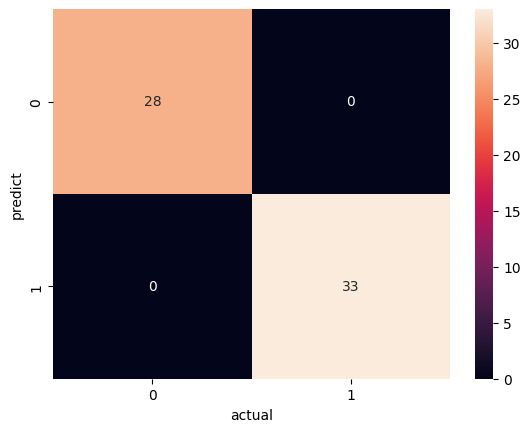

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix,annot =True)
plt.xlabel('actual')
plt.ylabel('predict')


# Confusion matrix to precision, Recall and F1 Score

In [162]:
from sklearn.metrics import precision_score
#precision for training data
precision_train=precision_score(Y_train,X_train_predict)
print('training data precision =', precision_train)

training data precision = 1.0


In [165]:
#precision for test data
precision_test=precision_score(Y_test,Y_pred)
print('training data precision =', precision_test)

training data precision = 1.0


In [175]:
from sklearn.metrics import recall_score
#recall for training data
recall_train=recall_score(Y_train,X_train_predict)
print('training data recall =', recall_train)

training data recall = 1.0


In [180]:
#recall for test data
recall_test=recall_score(Y_test,Y_pred)
print('test data recall =', recall_test)

test data recall = 1.0


In [179]:
from sklearn.metrics import f1_score
#F1 score for training data
F1_train=recall_score(Y_train,X_train_predict)
print('training data F1 score =', F1_train)

training data F1 score = 1.0


In [178]:
from sklearn.metrics import f1_score
#F1 score for test data
F1_train=f1_score(Y_train,X_train_predict)
print('test data F1 score =', F1_train)

test data F1 score = 1.0
